[LibSVM]

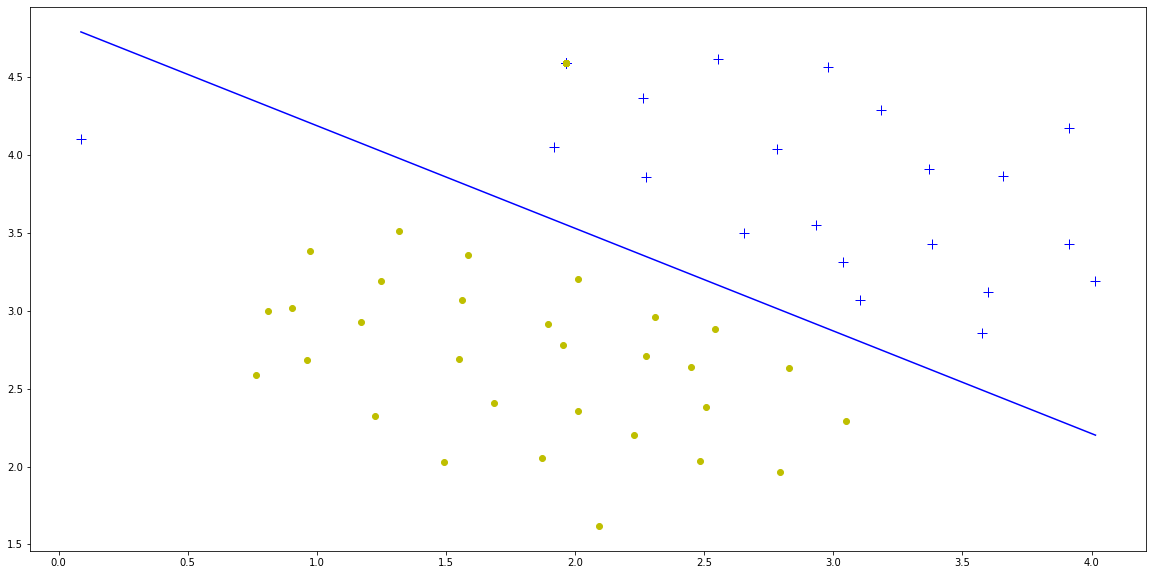

[LibSVM]

C:\Users\tanuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: UserWarning: No contour levels were found within the data range.


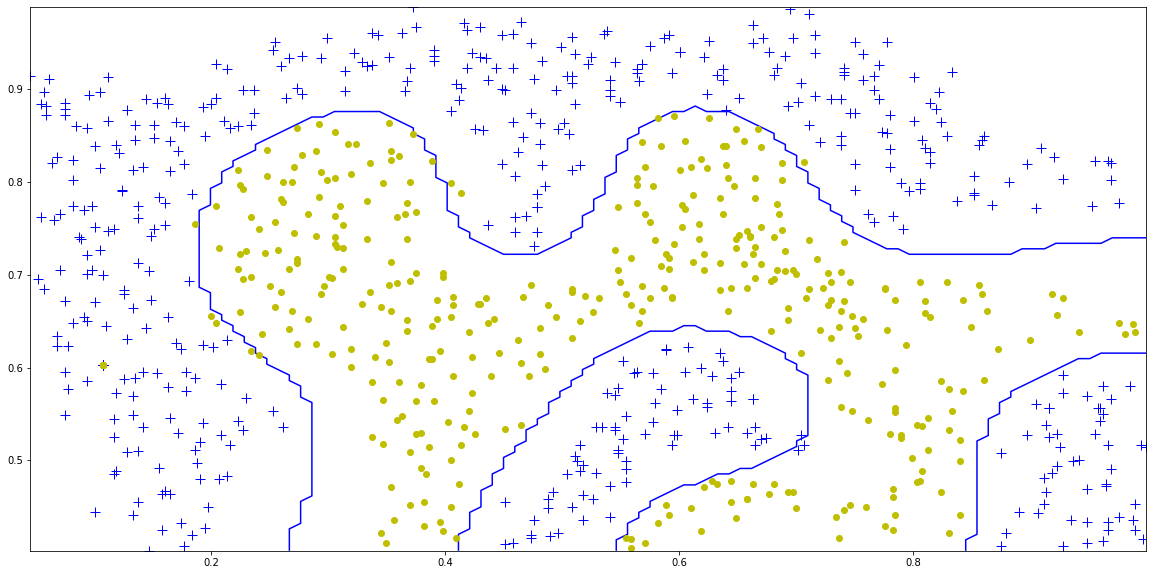

[LibSVM]

C:\Users\tanuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: UserWarning: No contour levels were found within the data range.


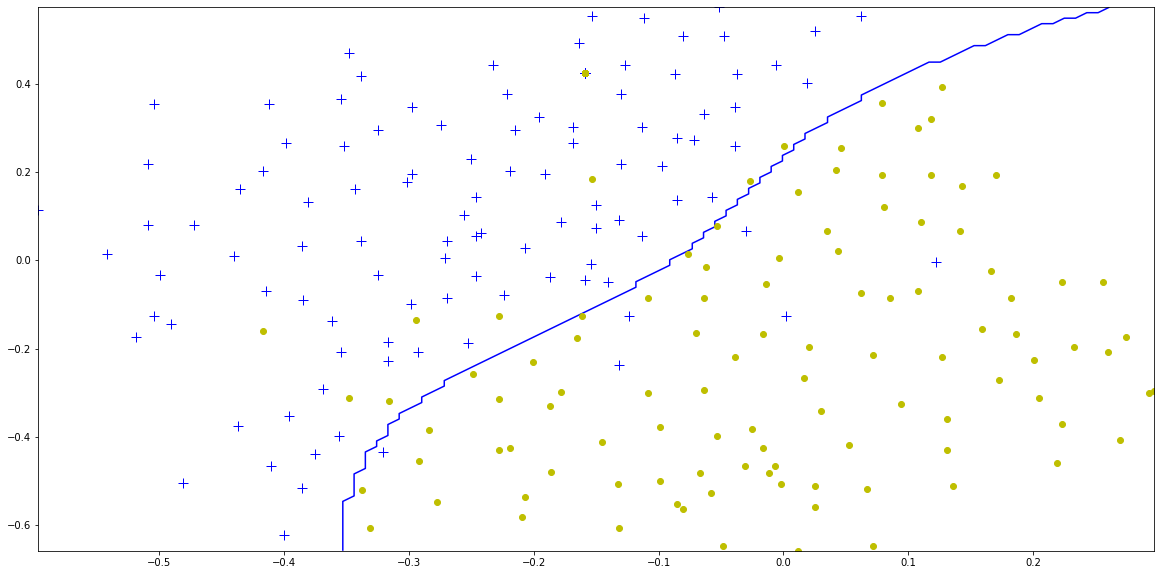

In [1]:
%matplotlib inline
from sklearn import svm
import scipy.io as io
import random
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def gaussianKernel(x1, x2, sigma):
    x1 = x1.flatten()
    x2 = x2.flatten()
    sim = np.exp(-np.sum((x1 - x2)**2)/(2*(sigma**2)))
    return sim

def gaussianMatrix(X1, X2, sigma):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussianKernel(x1, x2, sigma)
    return gram_matrix

mat = io.loadmat('ex6data1.mat')
X=mat['X']
y=mat['y']

pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)

C=1
tol=1e-3
max_passes=-1
sigma=0.1
y=y.flatten()
clf = svm.SVC(C = C, kernel="linear", tol=tol, max_iter=max_passes, verbose=2)
model=clf.fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]
xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
yp = - (w[0] * xp + b) / w[1]
plt.plot(xp, yp, 'b-')
plt.show()

mat = io.loadmat('ex6data2.mat')
X=mat['X']
y=mat['y']

pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)

C=1
tol=1e-3
max_passes=-1
sigma=0.1
y=y.flatten()
clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
model=clf.fit(gaussianMatrix(X,X,sigma), y)
x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
X1, X2 = np.meshgrid(x1plot, x2plot)
vals = np.zeros(X1.shape)
for i in range(X1.shape[1]):
    this_X = np.column_stack((X1[:, i], X2[:, i]))
    vals[:, i] = model.predict(gaussianMatrix(this_X, X,sigma))
    
plt.contour(X1, X2, vals, colors="blue", levels=[0])
plt.show()

mat = scipy.io.loadmat('ex6data3.mat')
X = mat["X"]
y = mat["y"]
pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)

tol=1e-3
max_passes=-1
sigma = 0.3
C = 1
y=y.flatten()
clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
model=clf.fit(gaussianMatrix(X,X,sigma), y)
x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
X1, X2 = np.meshgrid(x1plot, x2plot)
vals = np.zeros(X1.shape)
for i in range(X1.shape[1]):
    this_X = np.column_stack((X1[:, i], X2[:, i]))
    vals[:, i] = model.predict(gaussianMatrix(this_X, X, sigma))
    
plt.contour(X1, X2, vals, colors="blue", levels=[0])
plt.show()